# What is data parsing?
If you google definitions, you will find a bit of everything. There's a lot about syntactic analysis, changing file format, reading by the computer, etc. None of these definitions is incorrect. Put in simple terms, **parsing** is reading and processing files and, to do so, you need to convert the contents of the files to a format that is readable (both for you and the computer) and modifiable. You can parse a file directly by looping through its lines, but it is also possible to use Python libraries that will help you with the parsing, such as **pandas** and **re**. Let's start with the simplest (and yet more complicated) scenario, where we parse ``parse.csv`` directly by looping through the file.

## Looping through lines in a file
``parse.csv`` contains some information about a series of superheroes and villains: their name, alias, type (if they are heroes or villains) and the city and country where they are active. Let's take a look at it:

In [175]:
with open("parse.csv") as file: # Open the file
    for line in file: # Loop through lines in the file
        print(line) # Print lines

first_name,last_name,alias,class,city,country

Lax,Salmonsson,The Salmon,hero,Uppsala,Sweden

Ivo,Yolk,Dr. Eggsalt,villain,Tomatown,Easterland

Luis,Gibert,Orceman,hero,Orce,Spain

Walter,Bruce,Batswede,hero,Gothamburg,Sweden

Jac,Skämt,Skojaren,villain,Gothamburg,Sweden

Juanito,Naipes,El Bromas,villain,Grandía,Spain

Banan,D'Artagnan,Musketeer,hero,Morecastle,France



In this case, we used the ``with open()`` function, that executes all the lines of code that are indented inside, and then it **automatically closes the file**. The ``open()`` function can be used with a simpler syntax, which doesn't require you to indent the blocks of code below, but also **doesn't automatically close the file**:

In [176]:
file = open("parse.csv") # Open the file
for line in file: # Loop through lines in the file
    print(line) # Print lines
file.close() # Close file

first_name,last_name,alias,class,city,country

Lax,Salmonsson,The Salmon,hero,Uppsala,Sweden

Ivo,Yolk,Dr. Eggsalt,villain,Tomatown,Easterland

Luis,Gibert,Orceman,hero,Orce,Spain

Walter,Bruce,Batswede,hero,Gothamburg,Sweden

Jac,Skämt,Skojaren,villain,Gothamburg,Sweden

Juanito,Naipes,El Bromas,villain,Grandía,Spain

Banan,D'Artagnan,Musketeer,hero,Morecastle,France



As you can see, in this case you need to use a ``close()`` method after you're done processing your file. For this reason, I recommend to **always use ``with open(<path to file>) as <variable name>``**. Remember that, if your file is not in the same folder where you run your notebook or script, you won't manage to open it unless you provide the **path** to the file from the directory where you run your script.

## Text processing
Now we have looked into how to open a file, but perhaps this is not the most readable format. For example, we have a **header** line with the names of the variables –perhaps we want to skip that. Or perhaps we want to embrace chaos, that's up to you. However, I will assume that you want to improve readability, how to do that? The first thing that we can do is to **split** the lines into words, using the comma as a separator, since it is a comma-separated file (``.csv``):

In [177]:
with open("parse.csv") as file:
    for line in file:
        line = line.split(",") # New line
        print(line)

['first_name', 'last_name', 'alias', 'class', 'city', 'country\n']
['Lax', 'Salmonsson', 'The Salmon', 'hero', 'Uppsala', 'Sweden\n']
['Ivo', 'Yolk', 'Dr. Eggsalt', 'villain', 'Tomatown', 'Easterland\n']
['Luis', 'Gibert', 'Orceman', 'hero', 'Orce', 'Spain\n']
['Walter', 'Bruce', 'Batswede', 'hero', 'Gothamburg', 'Sweden\n']
['Jac', 'Skämt', 'Skojaren', 'villain', 'Gothamburg', 'Sweden\n']
['Juanito', 'Naipes', 'El Bromas', 'villain', 'Grandía', 'Spain\n']
['Banan', "D'Artagnan", 'Musketeer', 'hero', 'Morecastle', 'France\n']


Now we have it as a list! We have used the ``split()`` method and asked it to split the text at every comma. This is a bit nicer, but there are still some issues. For example, we have a special character, the linebreak ``\n``, after the last element in the list. We can remove special characters and spaces at the start and end of a string with the method ``strip()``. Note that this method works on strings, not in lists. Therefore, we should use ``strip()`` before we use ``split()``.

In [178]:
with open("parse.csv") as file:
    for line in file:
        line = line.strip() # New line
        line = line.split(",")
        print(line)

['first_name', 'last_name', 'alias', 'class', 'city', 'country']
['Lax', 'Salmonsson', 'The Salmon', 'hero', 'Uppsala', 'Sweden']
['Ivo', 'Yolk', 'Dr. Eggsalt', 'villain', 'Tomatown', 'Easterland']
['Luis', 'Gibert', 'Orceman', 'hero', 'Orce', 'Spain']
['Walter', 'Bruce', 'Batswede', 'hero', 'Gothamburg', 'Sweden']
['Jac', 'Skämt', 'Skojaren', 'villain', 'Gothamburg', 'Sweden']
['Juanito', 'Naipes', 'El Bromas', 'villain', 'Grandía', 'Spain']
['Banan', "D'Artagnan", 'Musketeer', 'hero', 'Morecastle', 'France']


We got rid of the linebreaks! But this is still not the nicest way to look into our data, even though we can already do simple transformations, like printing a combination of the variables:

In [179]:
with open("parse.csv") as file:
    next(file) # Skip header
    for line in file:
        line = line.strip()
        line = line.split(",")
        print_text = f"{line[0]} {line[1]}, known as {line[2]}, {line[3]} of {line[4]} ({line[5]})" # String to print the info nicely
        print(print_text) # Modified line

Lax Salmonsson, known as The Salmon, hero of Uppsala (Sweden)
Ivo Yolk, known as Dr. Eggsalt, villain of Tomatown (Easterland)
Luis Gibert, known as Orceman, hero of Orce (Spain)
Walter Bruce, known as Batswede, hero of Gothamburg (Sweden)
Jac Skämt, known as Skojaren, villain of Gothamburg (Sweden)
Juanito Naipes, known as El Bromas, villain of Grandía (Spain)
Banan D'Artagnan, known as Musketeer, hero of Morecastle (France)


This looks better. Actually, I could be looking at this forever. In fact, maybe I should, but I need to save it somewhere so that I don't forget. Maybe it's about time you learn **how to write files**.

In [102]:
with open("parse.csv") as file:
    next(file)
    for line in file:
        line = line.strip()
        line = line.split(",")
        print_text = f"{line[0]} {line[1]}, known as {line[2]}, {line[3]} of {line[4]} ({line[5]})"
        with open("my_output.txt", "a+") as output: # Create and append to new file
            output.write(print_text + "\n") # Write the print_text variable to new file

Now I have a file I can look at forever! Unless it gets lost in the mess of folders that my home directory is, yay! As you might have noticed, I used an additional argument when calling the open function ``a+``. This arguments refer to the parsing mode. There are four basic parsing modes:

1. ``r``: read mode. This is the default. You can't modify the file that you open in this mode.

2. ``w``: write mode. This allows you to create a file if it doesn't exist and add content to it. If it exists, it overwrites the file.

3. ``a``: append mode. This adds content to a file that already exists.

4. ``x``: create mode. Creates the files if it doesn't exist; otherwise it prompts an error.

There are, however, other modes that you can use. For example, the ``a+`` mode creates the file if it doesn't exist and it adds the new contents. It is similar to the write mode, but it doesn't overwrite the file every time (which would be a problem, because we are running the ``write()`` function in a loop! This ``write()`` function is where we specify the content that we want to **write** to the file.

We can keep processing the file in many different ways. In this case, I will use a dictionary comprehension to store a list of first names under the key ``first_name``, a list of last names under the key ``last_name`` and so on. The first step to do so will be to store the header and the values in separated variables:

In [181]:
with open("parse.csv") as file:
    values = [] # Empty list to store values
    for line in file:
        line = line.strip()
        line = line.split(",")
        if "first_name" in line: # If it is the header
            header = line # Store in a new variable
        else: values.append(line) # Otherwise store in values

# Print new variables
print(header, end = "\n\n")
print(values)

['first_name', 'last_name', 'alias', 'class', 'city', 'country']

[['Lax', 'Salmonsson', 'The Salmon', 'hero', 'Uppsala', 'Sweden'], ['Ivo', 'Yolk', 'Dr. Eggsalt', 'villain', 'Tomatown', 'Easterland'], ['Luis', 'Gibert', 'Orceman', 'hero', 'Orce', 'Spain'], ['Walter', 'Bruce', 'Batswede', 'hero', 'Gothamburg', 'Sweden'], ['Jac', 'Skämt', 'Skojaren', 'villain', 'Gothamburg', 'Sweden'], ['Juanito', 'Naipes', 'El Bromas', 'villain', 'Grandía', 'Spain'], ['Banan', "D'Artagnan", 'Musketeer', 'hero', 'Morecastle', 'France']]


Now, we want to separate the values by header (first names, last names, etc.):

In [92]:
new_list = [[]] # Create and empty list of lists
[new_list.append([]) for n in range(len(keys)-1)] # Make it contain as many lists as headers we have

[new_list[i].append(val[i]) for val in values for i in range(len(val))] # Put together values that should have the same header

value_dict = {header[i]: new_list[i] for i in range(len(header)-1)} # Create dictionary with headers as keys
print(value_dict)

{'first_name': ['Lax', 'Ivo', 'Luis', 'Walter', 'Jac', 'Juanito', 'Banan'], 'last_name': ['Salmonsson', 'Yolk', 'Gibert', 'Bruce', 'Skämt', 'Naipes', "D'Artagnan"], 'alias': ['The Salmon', 'Dr. Eggsalt', 'Orceman', 'Batswede', 'Skojaren', 'El Bromas', 'Musketeer'], 'class': ['hero', 'villain', 'hero', 'hero', 'villain', 'villain', 'hero'], 'city': ['Uppsala', 'Tomatown', 'Orce', 'Gothamburg', 'Gothamburg', 'Grandía', 'Morecastle']}


This was quite complicated, wasn't it? Luckily, there is an easier way to parse ``csv`` files: using **pandas**.

### pandas
Pandas is a Python library that makes data parsing much easier. Here I won't show you all of its possible uses, just how to create a **dataframe** from our ``csv`` file, ``parse.csv``, and the properties of this data type. The first step, like when we use any other library or module, is to **import** the module. The syntax is quite simple:

In [58]:
import pandas

You can use aliases to import modules; for example, if the module has a really long name and you want to shorter it. In this case, we don't need to use an alias badly, but it is common to import ``pandas`` using the alias ``pd``:

In [59]:
import pandas as pd

Now that we have imported the module, let's move to more important matters: how to use it.

In [91]:
with open("parse.csv") as file:
    my_df = pd.read_csv(file)
    
display(my_df)

,first_name,last_name,alias,class,city,country
0,Lax,Salmonsson,The Salmon,hero,Uppsala,Sweden
1,Ivo,Yolk,Dr. Eggsalt,villain,Tomatown,Easterland
2,Luis,Gibert,Orceman,hero,Orce,Spain
3,Walter,Bruce,Batswede,hero,Gothamburg,Sweden
4,Jac,Skämt,Skojaren,villain,Gothamburg,Sweden
5,Juanito,Naipes,El Bromas,villain,Grandía,Spain
6,Banan,D'Artagnan,Musketeer,hero,Morecastle,France


Wow, so simple and easy compared with the scenario where we create the dictionary! All the values are already sorted into columns, and we didn't need to make any effort! On top of that, if we use the **``display()``** function instead of the ``print()`` function, we get the dataframe in a nice table format!

Let's look into some properties of this new, mysterious data class that has saved us so much trouble.

In [90]:
my_df["first_name"]

0        Lax
1        Ivo
2       Luis
3     Walter
4        Jac
5    Juanito
6      Banan
Name: first_name, dtype: object

Wow, we can retrieve first names so easily!

In [110]:
my_df.columns

Index(['first_name', 'last_name', 'alias', 'class', 'city', 'country'], dtype='object')

Wow, it has a propertie where the names of the columns are stored! Will it have one for the rows?

In [112]:
my_df.index

RangeIndex(start=0, stop=7, step=1)

Yes, it does! (Even though its name might be a bit less straightforward...). Can we get specific rows, like we did for the columns?

In [117]:
my_df[my_df.index == 3]

,first_name,last_name,alias,class,city,country
3,Walter,Bruce,Batswede,hero,Gothamburg,Sweden


Yes, we can! The logic behind dataframes is not different to that behind **SQL databases**, for those of you who know SQL. The idea is that it should be easy to retrieve the pieces of information that we want from the dataframe. We can also select several data matching a particular criterion, for example, all the heros:

In [119]:
my_df[my_df["class"] == "hero"]

,first_name,last_name,alias,class,city,country
0,Lax,Salmonsson,The Salmon,hero,Uppsala,Sweden
2,Luis,Gibert,Orceman,hero,Orce,Spain
3,Walter,Bruce,Batswede,hero,Gothamburg,Sweden
6,Banan,D'Artagnan,Musketeer,hero,Morecastle,France


And that's not all! We can even specify several conditions. For example, we might want to select all heroes in Sweden:

In [122]:
my_df[(my_df["class"] == "hero") & (my_df["country"] == "Sweden")]

,first_name,last_name,alias,class,city,country
0,Lax,Salmonsson,The Salmon,hero,Uppsala,Sweden
3,Walter,Bruce,Batswede,hero,Gothamburg,Sweden


**OBS!** If you want to use several conditions, don't forget to use parentheses around every condition.

Perhaps we want to select a particular value from a row, for example, the hero name of hero 3, Walter Bruce. Then, we can use the following syntax:

In [101]:
my_df.loc[3][2]

'Batswede'

If we don't use the ``loc`` method, it will try to select element 2 (the third element, because again, indexes start at 0) from a column named 3 and it will prompt an error because no such column exists in this dataframe. Alternatively, if we want to select a row by index instead of by value, we can use the ``iloc`` method:

In [110]:
display(my_df.T)
display(my_df.T.iloc[3])

,0,1,2,3,4,5,6
first_name,Lax,Ivo,Luis,Walter,Jac,Juanito,Banan
last_name,Salmonsson,Yolk,Gibert,Bruce,Skämt,Naipes,D'Artagnan
alias,The Salmon,Dr. Eggsalt,Orceman,Batswede,Skojaren,El Bromas,Musketeer
class,hero,villain,hero,hero,villain,villain,hero
city,Uppsala,Tomatown,Orce,Gothamburg,Gothamburg,Grandía,Morecastle
country,Sweden,Easterland,Spain,Sweden,Sweden,Spain,France


0       hero
1    villain
2       hero
3       hero
4    villain
5    villain
6       hero
Name: class, dtype: object

Here I **transposed** the dataframe (turned rows into columns and vice-versa) using the **``T``** method to show how ``iloc`` uses indexes instead of values. In this case, the row (former column) at index 3 (fourth position) is called ``class``. If we tried to access this row with the ``loc`` method, it would prompt an error, because the row label is ``class``, not 3. If we use the original dataframe, both ``loc`` and ``iloc`` will do the exact same thing, because the label of the fourth row is equal to its index, 3:

In [112]:
display(my_df.loc[3])
display(my_df.iloc[3])

first_name        Walter
last_name          Bruce
alias           Batswede
class               hero
city          Gothamburg
country           Sweden
Name: 3, dtype: object

first_name        Walter
last_name          Bruce
alias           Batswede
class               hero
city          Gothamburg
country           Sweden
Name: 3, dtype: object

It is also possible to select several full rows with the ``loc`` or ``iloc`` methods:

In [106]:
my_df.loc[1:3, :]

,first_name,last_name,alias,class,city,country
1,Ivo,Yolk,Dr. Eggsalt,villain,Tomatown,Easterland
2,Luis,Gibert,Orceman,hero,Orce,Spain
3,Walter,Bruce,Batswede,hero,Gothamburg,Sweden


And there is yet more to come... For example, we can sort the data using any column; for example, I will sort the dataframe by last name in alphabetical order:

In [86]:
new_df = my_df.sort_values(by = "last_name", ascending = True)
display(new_df)

,first_name,last_name,alias,class,city,country
3,Walter,Bruce,Batswede,hero,Gothamburg,Sweden
6,Banan,D'Artagnan,Musketeer,hero,Morecastle,France
2,Luis,Gibert,Orceman,hero,Orce,Spain
5,Juanito,Naipes,El Bromas,villain,Grandía,Spain
0,Lax,Salmonsson,The Salmon,hero,Uppsala,Sweden
4,Jac,Skämt,Skojaren,villain,Gothamburg,Sweden
1,Ivo,Yolk,Dr. Eggsalt,villain,Tomatown,Easterland


The default sorting is sorting by index:

In [87]:
new_df.sort_index()

,first_name,last_name,alias,class,city,country
0,Lax,Salmonsson,The Salmon,hero,Uppsala,Sweden
1,Ivo,Yolk,Dr. Eggsalt,villain,Tomatown,Easterland
2,Luis,Gibert,Orceman,hero,Orce,Spain
3,Walter,Bruce,Batswede,hero,Gothamburg,Sweden
4,Jac,Skämt,Skojaren,villain,Gothamburg,Sweden
5,Juanito,Naipes,El Bromas,villain,Grandía,Spain
6,Banan,D'Artagnan,Musketeer,hero,Morecastle,France


We can also interchange the positions of columns and rows, as you can do when you **transpose** a matrix:

In [88]:
display(my_df.T)

,0,1,2,3,4,5,6
first_name,Lax,Ivo,Luis,Walter,Jac,Juanito,Banan
last_name,Salmonsson,Yolk,Gibert,Bruce,Skämt,Naipes,D'Artagnan
alias,The Salmon,Dr. Eggsalt,Orceman,Batswede,Skojaren,El Bromas,Musketeer
class,hero,villain,hero,hero,villain,villain,hero
city,Uppsala,Tomatown,Orce,Gothamburg,Gothamburg,Grandía,Morecastle
country,Sweden,Easterland,Spain,Sweden,Sweden,Spain,France


If you have a dataframe with thousand of data, printing the full thing might not be wise. In this case, you can use the ``head()`` and ``tail()`` methods to display the beginning or the end of the dataframe, respectively. With these methods, you can choose the number of rows that are displayed (five by default):

In [71]:
my_df.head()

,first_name,last_name,alias,class,city,country
0,Lax,Salmonsson,The Salmon,hero,Uppsala,Sweden
1,Ivo,Yolk,Dr. Eggsalt,villain,Tomatown,Easterland
2,Luis,Gibert,Orceman,hero,Orce,Spain
3,Walter,Bruce,Batswede,hero,Gothamburg,Sweden
4,Jac,Skämt,Skojaren,villain,Gothamburg,Sweden


In [66]:
my_df.head(2)

,first_name,last_name,alias,class,city,country
0,Lax,Salmonsson,The Salmon,hero,Uppsala,Sweden
1,Ivo,Yolk,Dr. Eggsalt,villain,Tomatown,Easterland


In [67]:
my_df.tail()

,first_name,last_name,alias,class,city,country
2,Luis,Gibert,Orceman,hero,Orce,Spain
3,Walter,Bruce,Batswede,hero,Gothamburg,Sweden
4,Jac,Skämt,Skojaren,villain,Gothamburg,Sweden
5,Juanito,Naipes,El Bromas,villain,Grandía,Spain
6,Banan,D'Artagnan,Musketeer,hero,Morecastle,France


In [68]:
my_df.tail(2)

,first_name,last_name,alias,class,city,country
5,Juanito,Naipes,El Bromas,villain,Grandía,Spain
6,Banan,D'Artagnan,Musketeer,hero,Morecastle,France


#### Creating dataframes from scratch

We can also create dataframes from scratch by specifying the contents. For example, the code below creates a ``n``x``n`` dataframe, where ``n`` is any integer, where the rows (``index``) and the columns go from 0 to ``n``, and the values are random integers from 0 to ``2n``:

In [135]:
import numpy as np

n = 7
int_df = pd.DataFrame(np.random.randint(0, 2*n, (n, n)), index = range(0, n), columns = range(0, n))

**OBS!** Here we are using **numpy**, another Python library, to generate random integers. We won't discuss this library in depth in the course, but you can also takes some notes on its possible uses.

In [136]:
display(int_df)

,0,1,2,3,4,5,6
0,0,0,8,4,9,7,2
1,2,1,10,6,1,7,4
2,4,6,12,2,7,10,6
3,9,11,7,11,6,12,6
4,3,0,7,12,4,8,7
5,13,13,0,4,5,3,6
6,4,12,1,9,4,5,6


Now that we have a numeric dataframe, we can calculate the mean values across rows and columns using the ``mean()`` method:

In [159]:
display(int_df.mean()) # Column mean
display(int_df.mean(1)) # Row mean

0    5.000000
1    6.142857
2    6.428571
3    6.857143
4    5.142857
5    7.428571
6    5.285714
dtype: float64

0    4.285714
1    4.428571
2    6.714286
3    8.857143
4    5.857143
5    6.285714
6    5.857143
dtype: float64

We can also check how many times a particular value is present:

In [174]:
display(int_df[0].value_counts())

4     2
0     1
2     1
9     1
3     1
13    1
Name: 0, dtype: int64

Feel free to play around with this dataframe and modify its size, values and row or column names. Keep in mind that, like in lists, you can include **different data types**. For example, in this new dataframe, we have integer indexes and float values:

In [153]:
n = 7
df = pd.DataFrame(np.random.rand(n, n)*2*n, index = range(0, n), columns = range(0, n))

In [154]:
display(df)

,0,1,2,3,4,5,6
0,2.023063,1.365997,13.143370,13.244441,0.132622,5.705956,6.844655
1,11.376349,13.803060,10.845299,13.303765,1.308713,12.980027,6.446806
2,1.780631,3.727359,6.537626,3.217363,6.336619,4.870261,9.160495
3,9.632777,1.142723,8.374347,10.281570,11.265754,12.310988,11.600424
4,1.800441,12.782365,10.806445,10.335307,0.615660,3.536047,9.383028
5,8.556277,5.210815,9.721565,12.836790,3.489331,11.882124,2.424095
6,3.135453,10.112988,6.168289,6.383324,3.626061,7.835864,13.654926


Now, we can replace the first value of column 1 with a ``NaN`` value, and in column 2 with a string:

In [155]:
df[1][0] = np.nan
df[2][0] = "hi"

In [156]:
display(df)

,0,1,2,3,4,5,6
0,2.023063,NaN,hi,13.244441,0.132622,5.705956,6.844655
1,11.376349,13.803060,10.845299,13.303765,1.308713,12.980027,6.446806
2,1.780631,3.727359,6.537626,3.217363,6.336619,4.870261,9.160495
3,9.632777,1.142723,8.374347,10.281570,11.265754,12.310988,11.600424
4,1.800441,12.782365,10.806445,10.335307,0.615660,3.536047,9.383028
5,8.556277,5.210815,9.721565,12.836790,3.489331,11.882124,2.424095
6,3.135453,10.112988,6.168289,6.383324,3.626061,7.835864,13.654926


Let's check the data types of the columns in the dataframe:

In [157]:
df.dtypes

0    float64
1    float64
2     object
3    float64
4    float64
5    float64
6    float64
dtype: object

As you can see, most columns only include floats, but for column 1, that includes different types of objects, the data type is referred to as ``object``, meaning that it can include objects of any class. Note that this is the result of including a string: ``NaNs`` are also considered floats, with the particularity that we can remove the rows with ``NaNs`` by using the ``dropna`` function:

In [158]:
display(df.dropna())

,0,1,2,3,4,5,6
1,11.376349,13.803060,10.845299,13.303765,1.308713,12.980027,6.446806
2,1.780631,3.727359,6.537626,3.217363,6.336619,4.870261,9.160495
3,9.632777,1.142723,8.374347,10.281570,11.265754,12.310988,11.600424
4,1.800441,12.782365,10.806445,10.335307,0.615660,3.536047,9.383028
5,8.556277,5.210815,9.721565,12.836790,3.489331,11.882124,2.424095
6,3.135453,10.112988,6.168289,6.383324,3.626061,7.835864,13.654926


There is a counterpart of this function, ``fillna``, that can be used to fill missing values with ``NaNs``.

## What should I do now?
Try to **create your own dataframe** from a ``csv`` file. Play around with the different methods: transpose the dataframe, select data, etc. You can also try options that were not introduced in this notebook, for example, try **adding new columns to the dataframe**, or test the ``fillna`` function! When you feel confident enough, you can try to **replicate** all the changes that you made to the dataframe by looping directly through the file.

**OBS!** Don't forget to write the final result of your parsing to a file.

In [ ]:
# Write your code here

## Re
So far, we learned how to process ``csv`` files, but you might need to deal with many different file formats. For some standardized formats that you might encounter, such as ``fasta`` files or ``GenBank`` files, there are functions in Biopython that can read the files for you. However, this will not always be the case. Knowing how to process texts, and being able to write a script to parse a file from scratch, might come in handy. The re module, which is a default module in Python, can be useful in these contexts. The name **re** stands for **r**egular **e**xpressions. **Regular expressions** let us define which sub-strings we want to extract from another string or text.

The best way to illustrate this is with an example. To test this library, I created a new file, ``metaphors.txt``. We will read the file and try to count the number of words:

In [325]:
lines = ""
with open("metaphors.txt") as meta:
    for line in meta:
        lines += line.replace("\n", "")
print(lines)

It was the last day of June. We were only one week past the longest day of the year. I could hear the cicadas sing, their crackling loud as fire wood burning to ashes. I was starting to regret that trip. One of my cousins had invited me to her summer house, located in the village where our mothers were born. When I received her invitation, my first instinct was to turn it down: The village was as welcoming as an active volcano in the summer. But my cousin insisted that I hadn't seen my family for too long, nurtured my homesickness with a collection of happy memories. In the end, I swear, I was looking forward to the damn trip. That changed as soon as I arrived to the summer house and felt the warmth of the sun on my scalp, patting my head and piercing my eyes with its claws. Let me tell you: light is sharper than steel. The breeze was dry and carried dust as if it was blowing from the desert. Plants around me were golden and dead like the statue of an old hero. The nearest body of wate

We can easily count the number of words in the string ``lines`` with ``re``:

In [326]:
import re
words = re.findall("\w+", lines)
print(len(words))

210


The ``\w`` flag tells the computer to match alphanumeric characters. The ``+`` flag tells it to merge characters into words. Therefore, this should work (at least in theory). To check if it is correct, we can also count the words in the file using the command line. The function ``system()`` in the ``os`` module allows to run strings as shell commands. The ``wc -w`` command counts the number of words in a file.

In [327]:
import os
os.system("wc -w metaphors.txt");

     209 metaphors.txt


One word less! Why might it be? Does ``re``, perhaps, count words with apostrophes like ``hadn't`` as two words?

In [328]:
print(words)

['It', 'was', 'the', 'last', 'day', 'of', 'June', 'We', 'were', 'only', 'one', 'week', 'past', 'the', 'longest', 'day', 'of', 'the', 'year', 'I', 'could', 'hear', 'the', 'cicadas', 'sing', 'their', 'crackling', 'loud', 'as', 'fire', 'wood', 'burning', 'to', 'ashes', 'I', 'was', 'starting', 'to', 'regret', 'that', 'trip', 'One', 'of', 'my', 'cousins', 'had', 'invited', 'me', 'to', 'her', 'summer', 'house', 'located', 'in', 'the', 'village', 'where', 'our', 'mothers', 'were', 'born', 'When', 'I', 'received', 'her', 'invitation', 'my', 'first', 'instinct', 'was', 'to', 'turn', 'it', 'down', 'The', 'village', 'was', 'as', 'welcoming', 'as', 'an', 'active', 'volcano', 'in', 'the', 'summer', 'But', 'my', 'cousin', 'insisted', 'that', 'I', 'hadn', 't', 'seen', 'my', 'family', 'for', 'too', 'long', 'nurtured', 'my', 'homesickness', 'with', 'a', 'collection', 'of', 'happy', 'memories', 'In', 'the', 'end', 'I', 'swear', 'I', 'was', 'looking', 'forward', 'to', 'the', 'damn', 'trip', 'That', 'chan

Let's replace ``hadn't`` with ``hadnot`` in the text and repeat the experiment. We could use the ``replace()`` method for strings, but we will use the ``re.sub()`` function instead to test this module:

In [329]:
#lines = lines.replace("hadn't", "had not")
new_lines = re.sub("hadn't", "hadnot", lines, 1)
print(new_lines)

It was the last day of June. We were only one week past the longest day of the year. I could hear the cicadas sing, their crackling loud as fire wood burning to ashes. I was starting to regret that trip. One of my cousins had invited me to her summer house, located in the village where our mothers were born. When I received her invitation, my first instinct was to turn it down: The village was as welcoming as an active volcano in the summer. But my cousin insisted that I hadnot seen my family for too long, nurtured my homesickness with a collection of happy memories. In the end, I swear, I was looking forward to the damn trip. That changed as soon as I arrived to the summer house and felt the warmth of the sun on my scalp, patting my head and piercing my eyes with its claws. Let me tell you: light is sharper than steel. The breeze was dry and carried dust as if it was blowing from the desert. Plants around me were golden and dead like the statue of an old hero. The nearest body of wate

In [330]:
words = re.findall("\w+", new_lines)
len(words)

209

Now we got the correct number! So that was the problem... is there any way to circumvent it? Yes, there is! But we can't use the default ``\w+`` definition of words, we need to provide our own definition.

In [331]:
words = re.findall(r"[A-z']+", lines)
print(len(words))

209


We did it! But at what cost? Perhaps you are lost now. What does ``r"[A-z']+"`` mean?, you might be asking. Let's look into it:

1. ``[A-z']``: The regular expression. Any uppercase or lowercase letter from A to Z (English alphabet) or an apostrophe.

3. **``+``**: Match the preceeding regular expression **one or more times**. Without this, it would count characters instead of words (it would match the expression for each character).

Now perhaps we want to count how many words including an ``a`` we have in the text. With this purpose, we can use the operator **``*``**, that takes **zero or more matches**.

In [332]:
a_words = re.findall(r"([A-z]*a[A-z]*)+", lines)
print(a_words)

['was', 'last', 'day', 'past', 'day', 'year', 'hear', 'cicadas', 'crackling', 'as', 'ashes', 'was', 'starting', 'that', 'had', 'located', 'village', 'invitation', 'was', 'village', 'was', 'as', 'as', 'an', 'active', 'volcano', 'that', 'hadn', 'family', 'a', 'happy', 'swear', 'was', 'forward', 'damn', 'That', 'changed', 'as', 'as', 'arrived', 'and', 'warmth', 'scalp', 'patting', 'head', 'and', 'claws', 'sharper', 'than', 'was', 'and', 'carried', 'as', 'was', 'Plants', 'around', 'and', 'dead', 'statue', 'an', 'nearest', 'water', 'was', 'a', 'lagoon', 'mountainside', 'that']


 The difference with the **``+``** operator is that it doesn't have to find at least one match. Here, if we were to replace the ``*`` with ``+``, we would lose those words that don't have any other character before or after a, such as ``and``, ``as`` or ``a``:

In [333]:
a_words = re.findall(r"([A-z]+a[A-z]+)+", lines)
print(a_words)

['was', 'last', 'day', 'past', 'day', 'year', 'hear', 'cicadas', 'crackling', 'was', 'starting', 'that', 'had', 'located', 'village', 'invitation', 'was', 'village', 'was', 'volcano', 'that', 'hadn', 'family', 'happy', 'swear', 'was', 'forward', 'damn', 'That', 'changed', 'warmth', 'scalp', 'patting', 'head', 'claws', 'sharper', 'than', 'was', 'carried', 'was', 'Plants', 'dead', 'statue', 'nearest', 'water', 'was', 'lagoon', 'mountainside', 'that']


Now, perhaps we want to get some statistics out of our file. It would be nice to count, for example, the number of times that each word appears, regardless of if it is lowercase or uppercase.

In [334]:
words = re.findall(r"[A-z']+", lines.lower()) # Get words
word_count = {} # Create empty dictionary
for word in words: # Loop through words
    if word not in word_count.keys(): # If the word is not in the dictionary
        word_count[word] = 1 # Initialize the count with one
    else: word_count[word] += 1 # Otherwise add 1 to the count
        
word_count = dict(sorted(word_count.items(), key = lambda wc: wc[1], reverse = True)) # Sort by highest counts
print(word_count)

{'the': 18, 'was': 8, 'my': 8, 'of': 7, 'i': 7, 'as': 6, 'to': 6, 'that': 4, 'summer': 4, 'and': 4, 'it': 3, 'were': 3, 'me': 3, 'house': 3, 'in': 3, 'day': 2, 'one': 2, 'trip': 2, 'her': 2, 'village': 2, 'an': 2, 'with': 2, 'a': 2, 'on': 2, 'from': 2, 'like': 2, 'last': 1, 'june': 1, 'we': 1, 'only': 1, 'week': 1, 'past': 1, 'longest': 1, 'year': 1, 'could': 1, 'hear': 1, 'cicadas': 1, 'sing': 1, 'their': 1, 'crackling': 1, 'loud': 1, 'fire': 1, 'wood': 1, 'burning': 1, 'ashes': 1, 'starting': 1, 'regret': 1, 'cousins': 1, 'had': 1, 'invited': 1, 'located': 1, 'where': 1, 'our': 1, 'mothers': 1, 'born': 1, 'when': 1, 'received': 1, 'invitation': 1, 'first': 1, 'instinct': 1, 'turn': 1, 'down': 1, 'welcoming': 1, 'active': 1, 'volcano': 1, 'but': 1, 'cousin': 1, 'insisted': 1, "hadn't": 1, 'seen': 1, 'family': 1, 'for': 1, 'too': 1, 'long': 1, 'nurtured': 1, 'homesickness': 1, 'collection': 1, 'happy': 1, 'memories': 1, 'end': 1, 'swear': 1, 'looking': 1, 'forward': 1, 'damn': 1, 'chan

We have some statistics, but this is not the nicest way to look at them. Perhaps it would be best to **plot** this information. Which brings us to...

## Plotting in Python
...is very painful. Seriously, if there is a Python hell you will probably have to try to make a very specific plot using **matplotlib** with no guidelines or instructions. You need to write ridiculously long scripts to make very simple plots. If this doesn't convince you to use matplotlib, what will? So, because this is a basic course, we will go through a basic example in matplotlib, a bar plot of our word counts, and compare it to a basic example with the more beginner-friendly library **seaborn**.

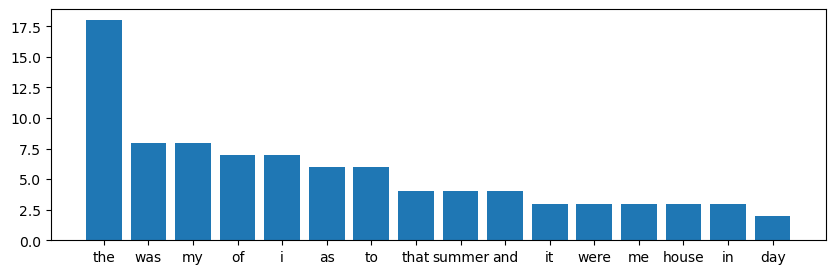

In [362]:
from matplotlib import pyplot as plt # Import module
x = list(word_count.keys())[:16] # Define our x (16 first values)
y = list(word_count.values())[:16]
plt.figure(figsize = (10, 3)) # Create figure of size (10, 3)
plt.bar(x, y); # Plot keys in x axis and values in y

This was simple, I'll give you that. But we definitely want to change some defaults, such as the ticks of the y axis or the spaces between the plot frame and the first and last bars. Let's try to do that...

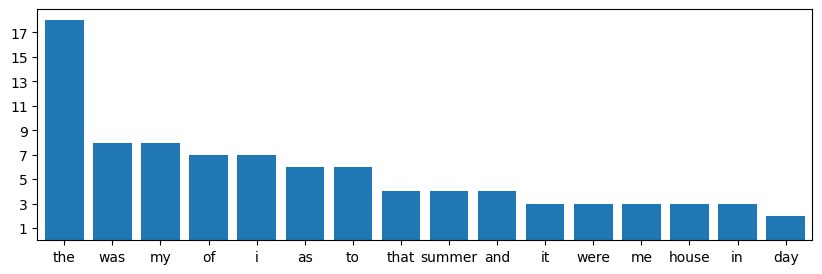

In [363]:
x = list(word_count.keys())[:16]
y = list(word_count.values())[:16]
plt.figure(figsize = (10, 3))
plt.bar(x, y);
plt.yticks(range(1, max(y)+1, 2)); # New line (change ticks of y axis)
plt.margins(x = 0.01, tight = True) # New line (change margins)

Much nicer! Even though the plot doesn't look so nice yet. A common (and fair) criticism of matplotlib is that it has **poor defaults**, and I think this plot illustrates that. But not all is negative: despite its flaws, matplotlib is also **quite flexible**. Let's try a new style for our plot:

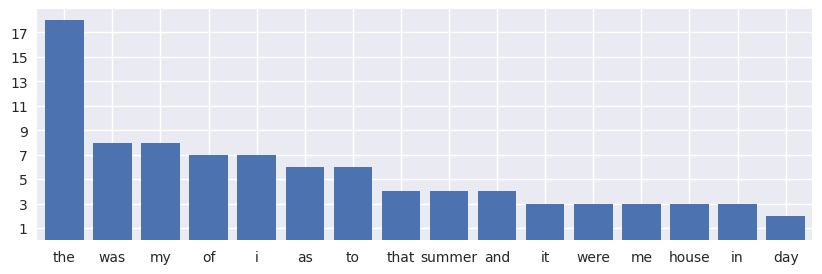

In [369]:
x = list(word_count.keys())[:16]
y = list(word_count.values())[:16]
with plt.style.context("seaborn"): # New line (eeeh... isn't this... you know... the name of the other package?)
    plt.figure(figsize = (10, 3))
    plt.bar(x, y);
    plt.yticks(range(1, max(y)+1, 2));
    plt.margins(x = 0.01, tight = True)

In [370]:
import seaborn